In [38]:
!pip install kaggle

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle competitions download -c jigsaw-toxic-comment-classification-challenge

 47% 25.0M/52.6M [00:00<00:00, 63.5MB/s]
100% 52.6M/52.6M [00:00<00:00, 107MB/s] 


In [5]:
# extracting the compessed dataset
from zipfile import ZipFile
dataset = '/content/jigsaw-toxic-comment-classification-challenge.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [6]:
!ls

jigsaw-toxic-comment-classification-challenge.zip  sample_submission.csv.zip  train.csv.zip
kaggle.json					   test.csv.zip
sample_data					   test_labels.csv.zip


In [7]:
import os
import pandas as pd
import tensorflow as tf
import numpy as np

In [8]:
df = pd.read_csv(os.path.join('/content/jigsaw-toxic-comment-classification-challenge.zip', '/content/train.csv.zip', '/content/train.csv.zip'))
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [9]:
df[df['toxic']==1].head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
12,0005c987bdfc9d4b,Hey... what is it..\n@ | talk .\nWhat is it......,1,0,0,0,0,0
16,0007e25b2121310b,"Bye! \n\nDon't look, come or think of comming ...",1,0,0,0,0,0
42,001810bf8c45bf5f,You are gay or antisemmitian? \n\nArchangel WH...,1,0,1,0,1,1
43,00190820581d90ce,"FUCK YOUR FILTHY MOTHER IN THE ASS, DRY!",1,0,1,0,1,0


In [10]:
df.iloc[0]['comment_text']

"Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27"

In [11]:
df[df.columns[2:]].iloc[0]

toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
Name: 0, dtype: int64

### Preprocess comment

In [12]:
from tensorflow.keras.layers import TextVectorization

In [13]:
X = df['comment_text']
y = df[df.columns[2:]].values

In [14]:
df.columns

Index(['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate'],
      dtype='object')

In [16]:
max_features = 20000 # number of words in the vocab
vectorize = TextVectorization(max_tokens=max_features,
                              output_sequence_length=180,
                              output_mode='int')

In [17]:
vectorize.adapt(X.values)

In [18]:
vectorize.get_vocabulary()

['',
 '[UNK]',
 'the',
 'to',
 'of',
 'and',
 'a',
 'you',
 'i',
 'is',
 'that',
 'in',
 'it',
 'for',
 'this',
 'not',
 'on',
 'be',
 'as',
 'have',
 'are',
 'your',
 'with',
 'if',
 'article',
 'was',
 'or',
 'but',
 'page',
 'my',
 'an',
 'from',
 'by',
 'do',
 'at',
 'about',
 'me',
 'so',
 'wikipedia',
 'can',
 'what',
 'there',
 'all',
 'has',
 'will',
 'talk',
 'please',
 'would',
 'its',
 'no',
 'one',
 'just',
 'like',
 'they',
 'he',
 'dont',
 'which',
 'any',
 'been',
 'should',
 'more',
 'we',
 'some',
 'other',
 'who',
 'see',
 'here',
 'also',
 'his',
 'think',
 'im',
 'because',
 'know',
 'how',
 'am',
 'people',
 'why',
 'edit',
 'articles',
 'only',
 'out',
 'up',
 'when',
 'were',
 'use',
 'then',
 'may',
 'time',
 'did',
 'them',
 'now',
 'being',
 'their',
 'than',
 'thanks',
 'even',
 'get',
 'make',
 'good',
 'had',
 'very',
 'information',
 'does',
 'could',
 'well',
 'want',
 'such',
 'sources',
 'way',
 'name',
 'these',
 'deletion',
 'pages',
 'first',
 'help'

In [19]:
vectorize('Hello world, life is sad')

<tf.Tensor: shape=(180,), dtype=int64, numpy=
array([ 288,  263,  306,    9, 1420,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
     

In [20]:
vectorized_text = vectorize(X.values)
vectorized_text

<tf.Tensor: shape=(159571, 180), dtype=int64, numpy=
array([[ 645,   76,    2, ...,    0,    0,    0],
       [   1,   54, 2489, ...,    0,    0,    0],
       [ 425,  441,   70, ...,    0,    0,    0],
       ...,
       [   1, 7392,  383, ...,    0,    0,    0],
       [   5,   12,  534, ...,    0,    0,    0],
       [   5,    8,  130, ...,    0,    0,    0]])>

In [21]:
# MCSHBAP - map, cache, shuffle, batch, prefetch from_tensor_slices, list_file
dataset = tf.data.Dataset.from_tensor_slices((vectorized_text, y))
dataset = dataset.cache()
dataset = dataset.shuffle(160000)
dataset = dataset.batch(2)
dataset = dataset.prefetch(8) # helps bottlencks

In [22]:
batch_X, batch_y = dataset.as_numpy_iterator().next()
batch_X.shape

(2, 180)

In [23]:
batch_y.shape

(2, 6)

In [24]:
train = dataset.take(int(len(dataset)*.7))
val = dataset.skip(int(len(dataset)*.7)).take(int(len(dataset)*.2))
test = dataset.skip(int(len(dataset)*.9)).take(int(len(dataset)*.1))

In [25]:
train_generator = train.as_numpy_iterator()
train_generator.next()

(array([[ 1100,     1,     1,  5997,    44,  1983,    84,  1100,     1,
         13011,    11,   599,     2,    79,  8904,  7133, 16255, 12653,
            13,   282,   160,    64,   348,   499,    14,    24,   103,
            33,    22,     6, 10485,    81,    16,  3882,     1,     1,
             2,   326,     1,     9,   531,     1,    66,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,

### Building the sequential model


In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Bidirectional, Dense, Embedding

In [27]:
model = Sequential()
# create the embedding layer
model.add(Embedding(max_features+1, 32)) # plus 1 because of unknown words
# create LSTM layer
model.add(Bidirectional(LSTM(32, activation='tanh')))
# feature extraction fully connected layer
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
# final layer
model.add(Dense(6, activation='sigmoid'))

In [28]:
model.compile(loss='BinaryCrossentropy', optimizer='Adam')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          640032    
                                                                 
 bidirectional (Bidirection  (None, 64)                16640     
 al)                                                             
                                                                 
 dense (Dense)               (None, 128)               8320      
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 6)                 774       
                                                        

In [29]:
history = model.fit(train, epochs=1, validation_data=val)

55850/55850 [==============================] - 918s 16ms/step - loss: 0.0613 - val_loss: 0.0480


In [31]:
history.history

{'loss': [0.06131790950894356], 'val_loss': [0.04800980165600777]}

In [30]:
from matplotlib import pyplot as plt

<Figure size 800x500 with 0 Axes>

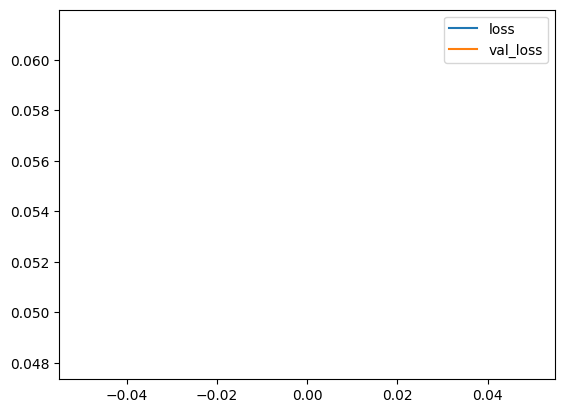

In [34]:
plt.figure(figsize=(8,5))
pd.DataFrame(history.history).plot()
plt.show()

### Make prediction

In [35]:
input_text = vectorize('You freaking suck!')

In [43]:
batch = test.as_numpy_iterator().next()
batch_X, batch_y = test.as_numpy_iterator().next()
batch_y

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

In [45]:
(model.predict(batch_X) > 0.5).astype(int)

1/1 [==============================] - 0s 49ms/step


array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

In [39]:
res = model.predict(np.expand_dims(input_text, 0))

1/1 [==============================] - 0s 33ms/step


### Evaluate Model

In [47]:
from tensorflow.keras.metrics import Precision, Recall, CategoricalAccuracy

In [49]:
pre = Precision()
re = Recall()
acc = CategoricalAccuracy()

In [50]:
for batch in test.as_numpy_iterator():
  # unpach the batch
  X_true, y_true = batch
  # make a prediction
  yhat = model.predict(X_true)

  # flatten the prediction
  y_true = y_true.flatten()
  yhat = yhat.flatten()

  pre.update_state(y_true, yhat)
  re.update_state(y_true, yhat)
  acc.update_state(y_true, yhat)

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 30ms/step


In [51]:
print(f'Percision: {pre.result().numpy()},Recall:{re.result().numpy()},Accuracy:{acc.result().numpy()}')

Percision: 0.8138317465782166,Recall:0.6606980562210083,Accuracy:0.5831035375595093


### Test and Gradio

In [ ]:
!pip install gradio jinja2

In [ ]:
import gradio as gr

In [63]:
model.save('/content/toxicity.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [65]:
model = tf.keras.models.load_model('toxicity.h5')

In [67]:
input_str = vectorize('hey I freaken hate you')

In [68]:
res = model.predict(np.expand_dims(input_str,0))

1/1 [==============================] - 1s 777ms/step


In [69]:
res

array([[0.7245907 , 0.01533516, 0.25683555, 0.0478875 , 0.38093016,
        0.03962291]], dtype=float32)

In [70]:
df.columns[2:]

Index(['toxic', 'severe_toxic', 'obscene', 'threat', 'insult',
       'identity_hate'],
      dtype='object')

In [71]:
def score_comment(comment):
  vectorized_comment = vectorize([comment])
  results = model.predict(vectorized_comment)

  text = ''
  for idx, col in enumerate(df.columns[2:-1]):
    text += '{}: {}\n'.format(col, results[0][idx]>0.5)
  return text

In [ ]:
interface = gr.Interfrace(fn=score_comment,
                          inputs=gr.inputs.Textbox(lines=2, placeholder='Comment to score'),
                          outputs='text')

# 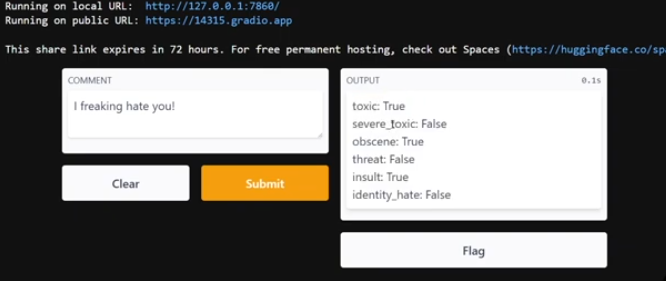

###  there's an error related to the Doc class from the typing_extensions module. This error commonly occurs when there is a version compatibility issue between different packages, and I've just copied the result of this sell above.



